In [7]:
import pandas as pd
import pyodbc as db
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import numpy as np
import os
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import itertools
from datetime import datetime

In [8]:
# Ипорт базы данных в формат данных "пандас.датафрейфм",
# это 2хмерная матрица с заголовками колонок и индексами строк
conn = db.connect('Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=D:\\Kortunov\\transfer\\Esentuk\\РЕЖИМ_по частям.mdb;')
curs = conn.cursor()#эти штуки нужны для работы с базаой курс - это курсор, просто для перемещения по БД
for row in curs.tables(): #этот цикл пробешает по всем таблицам и пишет их имена, просто для навигации
    print(row.table_name)

MSysAccessObjects
MSysAccessXML
MSysACEs
MSysNameMap
MSysNavPaneGroupCategories
MSysNavPaneGroups
MSysNavPaneGroupToObjects
MSysNavPaneObjectIDs
MSysObjects
MSysQueries
MSysRelationships
ДАННЫЕ ДЛЯ ГРАФИКОВ
Описание полей базы
ПОЛЯ БАЗ свойства
Скважины_АО_В РАСЧЕТЫ
Скважины_АО_ТЗ_Устья ВВОД И АНАЛИЗ
Часть 1_Гидродинамика
Часть 2_Химия
Часть 3_Химия_МГУ
Выборка скважины для графика


In [9]:
df_info = pd.read_sql_query("SELECT * FROM [Скважины_АО_В РАСЧЕТЫ];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_info['IDPN'] = df_info['ID PN']
df_info_IDPN =  df_info[['IDPN','Номер скважины']].copy()
df_info_IDPN

,IDPN,Номер скважины
0,110,418ʹ
1,104,41-бис
2,105,56
3,107,57-РЭ-бис
4,111,1-Э
5,112,2-Э
6,141,55
7,90020,1-КМВ
8,140,1-КМВ-бис
9,106,57-РЭ


In [10]:
df_chem = pd.read_sql_query("SELECT * FROM [Часть 2_Химия];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_chem

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,pH_водородный_показатель_ID_2201,Ra_(г/литр)_Радиоактивность_ID_7295,Rn_(нКи/литр)_Радиоактивность_ID_7290,...,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Уран_суммарно_U_(грамм_в_литре)_ID_3344,Фенол_(мг_в_литре)_ID_4006,Фторид_F-_(грамм_в_литре)_ID_3303,Характер_запаха_ID_2001,Хлорид_Cl-_(грамм_в_литре)_ID_2301,Хром_суммарно_Cr_(грамм_в_литре)_ID_3430,Цвет_ID_2003,Цианид_CN-_(грамм_в_литре)_ID_2306,Цинк_суммарно_Zn_(грамм_в_литре)_ID_3346
0,1955,3,13,0,0,143,1955-03-13 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955,3,14,0,0,143,1955-03-14 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955,3,15,0,0,143,1955-03-15 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955,3,19,0,0,143,1955-03-19 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1955,3,26,0,0,143,1955-03-26 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,2020,11,1,0,0,355,2020-11-01 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.8428,NaN,NaN,NaN,NaN
35545,2020,11,2,0,0,355,2020-11-02 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.9999,NaN,NaN,NaN,NaN
35546,2020,11,3,0,0,355,2020-11-03 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.5857,NaN,NaN,NaN,NaN
35547,2020,12,28,0,0,355,2020-12-28 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_cond = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\Kondicii.xlsx')
df_cond['Номер скважины'] = df_cond['Номер скважины'].astype(str)
df_cond_1 = pd.merge(df_cond,df_info_IDPN, on = 'Номер скважины')
df_cond_1

,Номер скважины,"Минерализация, мин","Минерализация, макс","Углекислота, мин","Углекислота, макс","Борная, мин","Борная, макс","Сероводород, макс","Сероводород, мин",IDPN
0,9,0.5,0.7,NaN,NaN,NaN,NaN,NaN,NaN,6001
1,75-бис,6.0,8.0,1.2,3.0,NaN,NaN,NaN,NaN,6002
2,70,0.5,0.7,NaN,NaN,NaN,NaN,NaN,NaN,10070
3,71,7.0,10.0,0.1,1.8,0.02,0.06,NaN,NaN,10071
4,17-бис,10.0,14.0,1.4,2.9,NaN,NaN,NaN,NaN,97
5,24-бис-1,10.0,14.0,0.1,1.8,0.04,0.08,NaN,NaN,355
6,36-бис,10.0,14.0,1.4,2.9,NaN,NaN,NaN,NaN,243
7,39-бис,7.0,10.0,1.1,2.8,NaN,NaN,NaN,NaN,246
8,418ʹ,7.0,10.0,1.2,1.8,NaN,NaN,NaN,NaN,110
9,418-бис,7.0,10.0,1.1,2.8,NaN,NaN,NaN,NaN,251


In [12]:
df_info

,ID PN,Номер скважины,ЗАПАСЫ м куб в сутки,ПЛАН ЗАПАСЫ м куб в сутки,Горизонт,АО устья,АО Точки Замера,abs,аотз,АО ЗЕМЛИ,...,ШИРОТА МЕТРЫ,ДОЛГОТА ГРАДУСЫ,ШИРОТА ГРАДУСЫ,Тип воды,gkx,gky,glub,состояние,Примечания,IDPN
0,110,418ʹ,4.0,4.0,P1d - sl,596.90,595.25,595.250000,595.250000,597.330,...,4881188.200,42.867500,44.045611,Ессентуки-4,4868520.00,3210675.00,155.199997,Резервная,None,110
1,104,41-бис,2.0,2.0,P1d - sl,600.51,602.98,600.510010,602.940002,600.510,...,4880091.155,42.863694,44.035667,Ессентуки-4,4867400.00,3210360.00,115.000000,Эксплуатационная,None,104
2,105,56,1.5,1.5,P1d - sl,592.94,595.40,592.940002,595.400024,592.940,...,4881281.650,42.874528,44.046583,Ессентуки-4,4868625.00,3211250.00,190.500000,Эксплуатационная,В процессе работы скважины абс. Отметка точки ...,105
3,107,57-РЭ-бис,25.0,25.0,P1d - sl,599.74,602.66,599.760010,602.659973,599.760,...,NaN,NaN,NaN,Ессентуки-4,4867080.00,3210425.00,92.000000,Эксплуатационная,None,107
4,111,1-Э,160.0,160.0,К2,609.08,609.08,609.539978,609.169983,609.540,...,NaN,NaN,NaN,Сероводородные,4868640.00,3210660.00,462.000000,Эксплуатационная,None,111
5,112,2-Э,40.0,40.0,К2,618.73,618.73,619.400024,618.729980,619.400,...,4881283.150,42.860417,44.046333,Сероводородные,4868610.00,3210105.00,435.000000,Эксплуатационная,None,112
6,141,55,175.0,175.0,K1a - al1,669.80,669.80,669.349976,669.799988,669.350,...,4885770.209,42.889222,44.087250,Азотные термальные,4873140.00,3212465.00,1221.650024,Эксплуатационная,None,141
7,90020,1-КМВ,NaN,NaN,J3tt - K1v,669.68,669.68,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,90020
8,140,1-КМВ-бис,100.0,100.0,J3tt - K1v,671.35,671.35,669.549988,671.349976,669.550,...,4885822.880,42.889111,44.087722,Слабоуглекислые термальные,4873170.00,3212480.00,1468.000000,Эксплуатационная,None,140
9,106,57-РЭ,NaN,NaN,P1d - sl,599.76,602.97,599.760010,602.969971,599.760,...,4879743.681,42.864556,44.032556,None,NaN,NaN,90.000000,Резервная,None,106


In [107]:
#df_cond['Номер скважины'] = df_cond['Номер скважины'].astype(str)
wellnumbers = df_cond_1['IDPN'].tolist()
wellnumbers = wellnumbers[0:21]
wellnumbers
wellnames = df_cond_1['Номер скважины'].tolist()
wellnames = wellnames[0:21]
wellnames

['9',
 '75-бис',
 '70',
 '71',
 '17-бис',
 '24-бис-1',
 '36-бис',
 '39-бис',
 '418ʹ',
 '418-бис',
 '33-бис',
 '56',
 '34-бис',
 '41-бис',
 '57-РЭ-бис',
 '1-Э',
 '2-Э',
 '55',
 '1-КМВ-бис',
 '46',
 '49-Э']

0
6001
1
6002


TypeError: cannot convert the series to <class 'float'>

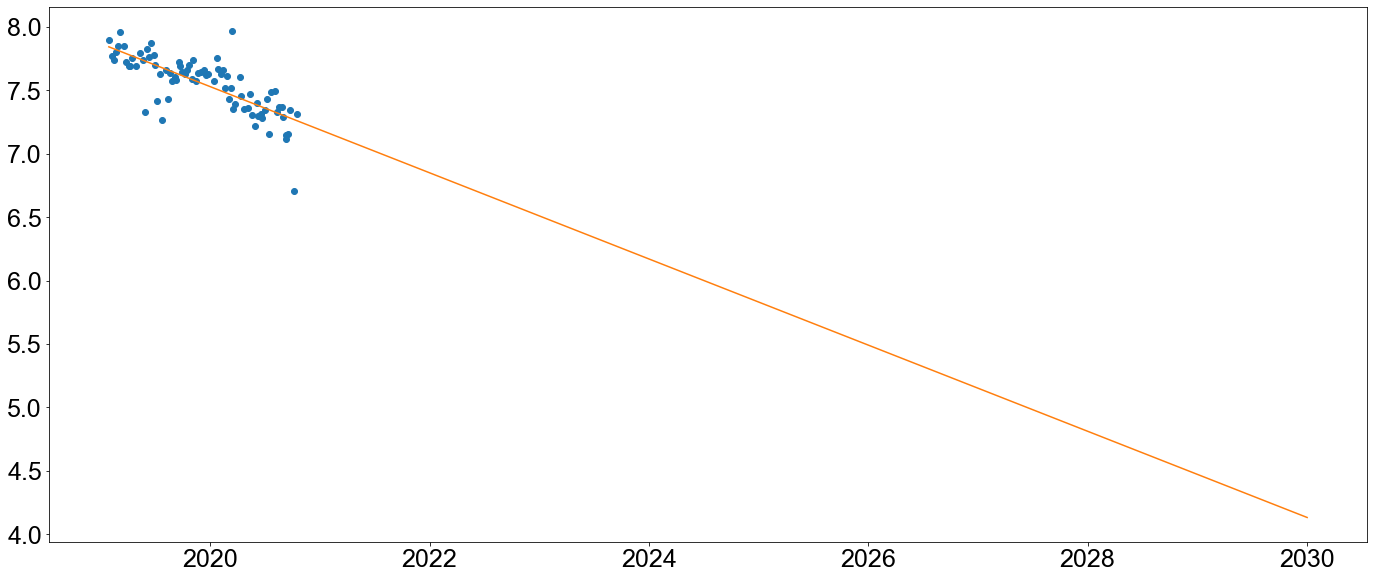

In [106]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 25,
       'ytick.labelsize': 25,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 25/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
#wellnumbers=wellnumbers[7:]
#wellnames=wellnames[7:]
rcParams.update(params)
xlim = ('2019-01')
xlim_max = ('2021-01')
xlim_future=('2030-01')
xlim = datetime.strptime(xlim , '%Y-%m')
xlim_max = datetime.strptime(xlim_max , '%Y-%m')
xlim_future = datetime.strptime(xlim_future , '%Y-%m')
#xlim1 = (2009*365, 2021.5*365)
for a in range(0,len(welllnumbers)):
    print(a)
    print(wellnumbers[a])
    well = df_chem[df_chem['IDPN'] == welllnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
    well = well[(well['ДАТА'] < xlim_max)]
    #lns6 = ax8.plot(well['ДАТА'], well['Минерализация_(грамм_в_литре)_ID_2208'],'o', alpha = 0.7, color = "lightcoral",label = 'Минерализация',markersize=14,markeredgewidth=0,zorder=15)   
    temp = well[['ДАТА','Минерализация_(грамм_в_литре)_ID_2208']].copy()
    temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])
    сondizii = df_cond[df_cond["Номер скважины"] == str(wellnames[a])]
    temp = temp.dropna()
    #well['elapsed'] = (well['ДАТА'] - well['ДАТА'].iloc[0]).astype("timedelta64[m]")
    m, b = np.polyfit(temp['ДАТА_Числ'],temp['Минерализация_(грамм_в_литре)_ID_2208'], 1)
    fig, ax1 = plt.subplots()
    lns1 = ax1.plot(temp['ДАТА'],temp['Минерализация_(грамм_в_литре)_ID_2208'],'o')
    df_new_line = pd.DataFrame([[xlim_future,0,mdates.date2num(xlim_future)]], columns=['ДАТА','Минерализация_(грамм_в_литре)_ID_2208','ДАТА_Числ'])  
    temp = temp.append(df_new_line, ignore_index=True)
    lns2 = ax1.plot(temp['ДАТА'],m*temp['ДАТА_Числ']+b)

#    lns8=  ax1.axhspan(float(сondizii['Минерализация, мин']), float(сondizii['Минерализация, макс']), facecolor="lightcoral", alpha=0.2,label = 'Кондиции по минерализации',zorder=0)
    
    ax1.annotate('Скважина '+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
        xy=(0.85, 1.1), xycoords='axes fraction',
        horizontalalignment='center', verticalalignment='top',
        fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.set_xlabel('Время (дата), года', color = "black")
    ax1.set_ylabel('Минерализация, г/$дм^3$', color = "black")
    ###############################################################
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
    directory = 'D:\\WORK\\MSU\\Esentuk\\figures\\wells\\prognoz_1'
    filename = '\\'+str(wellnames[a])+'_Ten_Years.png'# и рисунок поменял на джипег
    fullpath = directory + filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    keepcharacters = (' ','.','_',')','(','\\',':')
    fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
    plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
    plt.close()
    fig.clf

In [60]:
well = df_chem[df_chem['IDPN'] == welllnumbers[4]]
well = well[(well['ДАТА'] > xlim)]
well = well[(well['ДАТА'] < xlim_max)]
#lns6 = ax8.plot(well['ДАТА'], well['Минерализация_(грамм_в_литре)_ID_2208'],'o', alpha = 0.7, color = "lightcoral",label = 'Минерализация',markersize=14,markeredgewidth=0,zorder=15)   
temp = well[['ДАТА','Минерализация_(грамм_в_литре)_ID_2208']].copy()
temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])
сondizii = df_cond[df_cond["Номер скважины"] == str(wellnames[a])]
#well['elapsed'] = (well['ДАТА'] - well['ДАТА'].iloc[0]).astype("timedelta64[m]")
m, b = np.polyfit(temp['ДАТА_Числ'],temp['Минерализация_(грамм_в_литре)_ID_2208'], 1)
fig, ax1 = plt.subplots()
lns2 = ax1.plot(temp['ДАТА'],m*temp['ДАТА_Числ']+b)
lns1 = ax1.plot(temp['ДАТА'],temp['Минерализация_(грамм_в_литре)_ID_2208'],'o')
lns8=  ax1.axhspan(float(сondizii['Минерализация, мин']), float(сondizii['Минерализация, макс']), facecolor="lightcoral", alpha=0.2,label = 'Кондиции по минерализации',zorder=0)
ax1.annotate('Скважина '+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
    xy=(0.85, 1.1), xycoords='axes fraction',
    horizontalalignment='center', verticalalignment='top',
    fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

LinAlgError: SVD did not converge in Linear Least Squares

In [44]:
temp = well[['ДАТА','Минерализация_(грамм_в_литре)_ID_2208']].copy()
temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])
temp

,ДАТА,Минерализация_(грамм_в_литре)_ID_2208,ДАТА_Числ
32977,2019-01-29 00:00:00,7.899558,737088.0
33015,2019-02-07 00:00:00,7.772848,737097.0
33044,2019-02-14 00:00:00,7.736413,737104.0
33073,2019-02-21 00:00:00,7.803846,737111.0
33101,2019-02-28 00:00:00,7.852043,737118.0
...,...,...,...
35416,2020-09-17 00:00:00,7.159715,737685.0
35452,2020-09-24 00:00:00,7.346926,737692.0
35495,2020-10-07 00:00:00,6.702895,737705.0
35517,2020-10-15 00:00:00,7.317558,737713.0


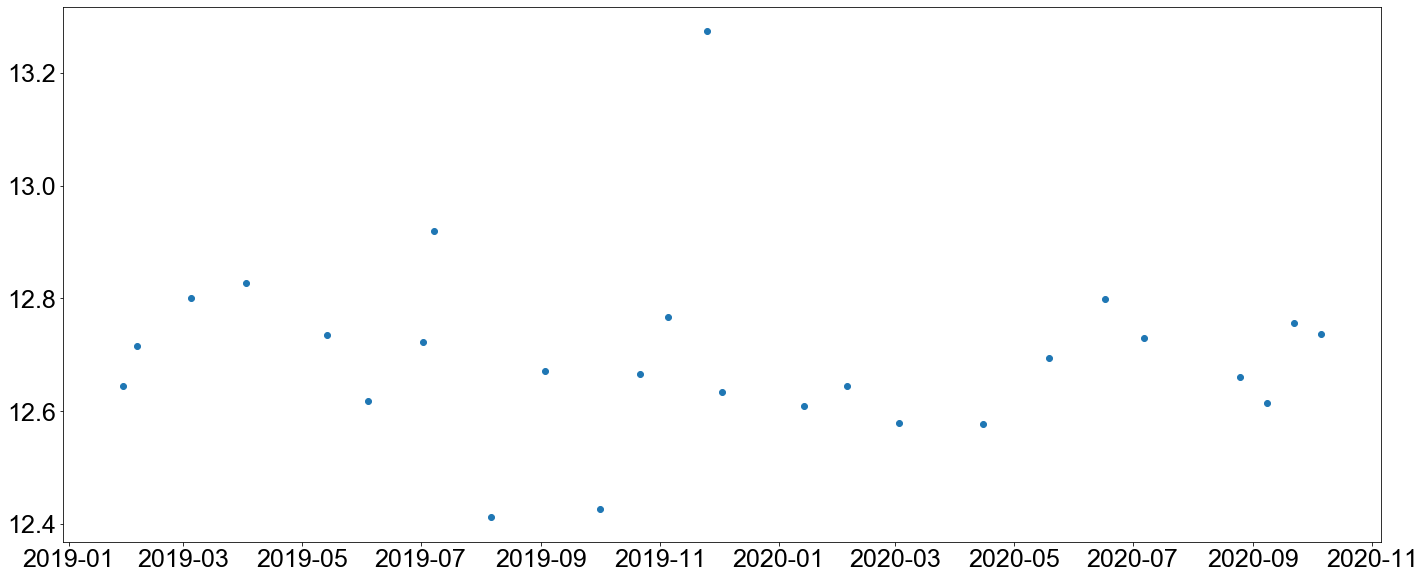

In [58]:
fig, ax1 = plt.subplots()
#lns2 = ax1.plot(temp['ДАТА'],m*temp['ДАТА_Числ']+b)
lns1 = ax1.plot(temp['ДАТА'],temp['Минерализация_(грамм_в_литре)_ID_2208'],'o')

In [65]:
temp

,ДАТА,Минерализация_(грамм_в_литре)_ID_2208,ДАТА_Числ
32972,2019-01-29 00:00:00,8.325689,737088.0
33011,2019-02-07 00:00:00,8.251060,737097.0
33040,2019-02-14 00:00:00,8.300934,737104.0
33069,2019-02-21 00:00:00,8.329490,737111.0
33097,2019-02-28 00:00:00,8.334253,737118.0
...,...,...,...
35384,2020-09-10 00:00:00,8.122922,737678.0
35411,2020-09-17 00:00:00,8.255055,737685.0
35447,2020-09-24 00:00:00,8.184405,737692.0
35490,2020-10-07 00:00:00,8.399367,737705.0


In [68]:
xlim_future=('2030-01')
xlim_future = datetime.strptime(xlim_future , '%Y-%m')
df_new_line = pd.DataFrame([[xlim_future,0,mdates.date2num(xlim_future)]], columns=['ДАТА','Минерализация_(грамм_в_литре)_ID_2208','ДАТА_Числ'])  
temp = temp.append(df_new_line, ignore_index=True)
temp

,ДАТА,Минерализация_(грамм_в_литре)_ID_2208,ДАТА_Числ
0,2019-01-29 00:00:00,8.325689,737088.0
1,2019-02-07 00:00:00,8.251060,737097.0
2,2019-02-14 00:00:00,8.300934,737104.0
3,2019-02-21 00:00:00,8.329490,737111.0
4,2019-02-28 00:00:00,8.334253,737118.0
...,...,...,...
77,2020-09-17 00:00:00,8.255055,737685.0
78,2020-09-24 00:00:00,8.184405,737692.0
79,2020-10-07 00:00:00,8.399367,737705.0
80,2020-10-15 00:00:00,8.206228,737713.0


In [18]:
df_step = pd.read_excel(r"D:\Kortunov\transfer\Esentuk\Ступени дебита.xlsx", header = 0)
df_step['ДАТА']=pd.to_datetime(df_step['ДАТА'])

In [20]:
df_step

0      2019-06-01
1      2019-06-01
2      2019-06-01
3      2019-06-01
4      2019-06-01
          ...    
8244   2020-10-31
8245   2020-10-31
8246   2020-10-31
8247   2020-10-31
8248   2020-10-31
Name: ДАТА, Length: 8249, dtype: datetime64[ns]

In [122]:
xlim_future=('2030-01')
xlim_future = datetime.strptime(xlim_future , '%Y-%m')

well = df_chem[df_chem['IDPN'] == 110]
countnulls1 = well['Минерализация_(грамм_в_литре)_ID_2208'].count()
countnulls1

In [131]:
well

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,pH_водородный_показатель_ID_2201,Ra_(г/литр)_Радиоактивность_ID_7295,Rn_(нКи/литр)_Радиоактивность_ID_7290,...,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Уран_суммарно_U_(грамм_в_литре)_ID_3344,Фенол_(мг_в_литре)_ID_4006,Фторид_F-_(грамм_в_литре)_ID_3303,Характер_запаха_ID_2001,Хлорид_Cl-_(грамм_в_литре)_ID_2301,Хром_суммарно_Cr_(грамм_в_литре)_ID_3430,Цвет_ID_2003,Цианид_CN-_(грамм_в_литре)_ID_2306,Цинк_суммарно_Zn_(грамм_в_литре)_ID_3346
35490,2020,10,7,0,0,245,2020-10-07 00:00:00,6.76,NaN,NaN,...,6.212,NaN,NaN,0.0015,1.0,1.6259,NaN,1.0,NaN,NaN
35514,2020,10,15,0,0,245,2020-10-15 00:00:00,7.03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.6330,NaN,1.0,NaN,NaN


In [130]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 25,
       'ytick.labelsize': 25,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 25/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
#wellnumbers=wellnumbers[7:]
#wellnames=wellnames[7:]
rcParams.update(params)
xlim_future=('2030-01')
xlim_future = datetime.strptime(xlim_future , '%Y-%m')
for a in range(0,len(wellnumbers)):
    print(a)
    print(wellnumbers[a])
    countnulls1 = 0
    df_step_temp = df_step[df_step['IDPN'] == wellnumbers[a]]
    well = df_chem[df_chem['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > df_step_temp['ДАТА'].min())]
    well = well[(well['ДАТА'] < df_step_temp['ДАТА'].max())]
    countnulls1 = well['Минерализация_(грамм_в_литре)_ID_2208'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
        #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    if countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график

        color = itertools.cycle(("tab:purple", 'forestgreen', 'tab:orange', 'royalblue', 'tab:brown','maroon'))
        color1 = itertools.cycle(("tab:purple", 'forestgreen', 'tab:orange', 'royalblue', 'tab:brown','maroon'))
        stupen_num = itertools.cycle(("Ступень 1", 'Ступень 2', 'Cтупень 3', 'Ступень 4', 'Ступень 5','Ступень 6'))
        marker = itertools.cycle(("d", '+', 'D', 'o', '*',"^","h")) 
        fig, ax1 = plt.subplots()

        #lns6 = ax8.plot(well['ДАТА'], well['Минерализация_(грамм_в_литре)_ID_2208'],'o', alpha = 0.7, color = "lightcoral",label = 'Минерализация',markersize=14,markeredgewidth=0,zorder=15)   
        temp = well[['ДАТА','Минерализация_(грамм_в_литре)_ID_2208']].copy()
        temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])
        temp = temp.dropna()
        #well['elapsed'] = (well['ДАТА'] - well['ДАТА'].iloc[0]).astype("timedelta64[m]")
        m, b = np.polyfit(temp['ДАТА_Числ'],temp['Минерализация_(грамм_в_литре)_ID_2208'], 1)
        df_new_line = pd.DataFrame([[xlim_future,0,mdates.date2num(xlim_future)]], columns=['ДАТА','Минерализация_(грамм_в_литре)_ID_2208','ДАТА_Числ'])  
        temp = temp.append(df_new_line, ignore_index=True)
        lns5 = ax1.plot(temp['ДАТА'],m*temp['ДАТА_Числ']+b, '--',color = 'black', label = 'По всем данным')
        for stupen in range(1,df_step_temp['Этап'].max()+1):
            print("stupen = "+ str(stupen))
            df_step_temp_temp = df_step_temp[(df_step_temp['Этап'] == stupen)]
            xlim = df_step_temp_temp['ДАТА'].min()
            xlim_max = df_step_temp_temp['ДАТА'].max()
            print(str(xlim)+' '+str(xlim_max))
            well = df_chem[df_chem['IDPN'] == wellnumbers[a]]
            well = well[(well['ДАТА'] > xlim)]
            well = well[(well['ДАТА'] < xlim_max)]
            countnulls = well['Минерализация_(грамм_в_литре)_ID_2208'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
            #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
            if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
            #lns6 = ax8.plot(well['ДАТА'], well['Минерализация_(грамм_в_литре)_ID_2208'],'o', alpha = 0.7, color = "lightcoral",label = 'Минерализация',markersize=14,markeredgewidth=0,zorder=15)   
                temp = well[['ДАТА','Минерализация_(грамм_в_литре)_ID_2208']].copy()
                temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])

                temp = temp.dropna()
                #well['elapsed'] = (well['ДАТА'] - well['ДАТА'].iloc[0]).astype("timedelta64[m]")
                m, b = np.polyfit(temp['ДАТА_Числ'],temp['Минерализация_(грамм_в_литре)_ID_2208'], 1)

                lns1 = ax1.plot(temp['ДАТА'],temp['Минерализация_(грамм_в_литре)_ID_2208'],marker = next(marker), color = next(color), markersize=10, label = next(stupen_num))
                df_new_line = pd.DataFrame([[xlim_future,0,mdates.date2num(xlim_future)]], columns=['ДАТА','Минерализация_(грамм_в_литре)_ID_2208','ДАТА_Числ'])  
                temp = temp.append(df_new_line, ignore_index=True)
                lns2 = ax1.plot(temp['ДАТА'],m*temp['ДАТА_Числ']+b, '--',color = next(color1))



            else:
                next(color)
                next(marker)
                next(color1)
                next(stupen_num)




        ax1.annotate('Скважина '+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
            xy=(0.85, 1.1), xycoords='axes fraction',
            horizontalalignment='center', verticalalignment='top',
            fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax1.set_xlabel('Время (дата), года', color = "black")
        ax1.set_ylabel('Минерализация, г/$дм^3$', color = "black")
        сondizii = df_cond[df_cond["Номер скважины"] == str(wellnames[a])]
        #ax1.set_ylim(float(сondizii['Минерализация, мин'])-5*float(сondizii['Минерализация, мин'])/100,float(сondizii['Минерализация, макс'])+5*float(сondizii['Минерализация, макс'])/100)
        ax1.set_ylim(float(сondizii['Минерализация, мин'])-30*float(сondizii['Минерализация, мин'])/100,float(сondizii['Минерализация, макс'])+30*float(сondizii['Минерализация, макс'])/100) 
        lns8=  ax1.axhspan(float(сondizii['Минерализация, мин']), float(сondizii['Минерализация, макс']), facecolor="lightcoral", alpha=0.2,label = 'Кондиции по минерализации',zorder=0)
        ax1.legend(frameon=False,mode = "expend", loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6) 
##############################################################################################################
        plt.tight_layout()
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
        fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
        directory = 'D:\\WORK\\MSU\\Esentuk\\figures\\wells\\prognoz_2'
        filename = '\\'+str(wellnames[a])+'_Ten_Years.png'# и рисунок поменял на джипег
        fullpath = directory + filename
        if not os.path.exists(directory):
            os.makedirs(directory)
        keepcharacters = (' ','.','_',')','(','\\',':')
        fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
        plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
        plt.close()
        fig.clf
        # well = well[(well['ДАТА'] > xlim)]
# well = well[(well['ДАТА'] < xlim_max)]
# #lns6 = ax8.plot(well['ДАТА'], well['Минерализация_(грамм_в_литре)_ID_2208'],'o', alpha = 0.7, color = "lightcoral",label = 'Минерализация',markersize=14,markeredgewidth=0,zorder=15)   
# temp = well[['ДАТА','Минерализация_(грамм_в_литре)_ID_2208']].copy()
# temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])
# сondizii = df_cond[df_cond["Номер скважины"] == str(wellnames[a])]
# temp = temp.dropna()

0
6001
stupen = 1
2020-03-02 00:00:00 2020-05-12 00:00:00
stupen = 2
2020-05-13 00:00:00 2020-09-30 00:00:00
1
6002
stupen = 1
2020-03-02 00:00:00 2020-05-12 00:00:00
stupen = 2
2020-05-13 00:00:00 2020-09-30 00:00:00
2
10070
stupen = 1
2020-02-07 00:00:00 2020-04-13 00:00:00
stupen = 2
2020-04-14 00:00:00 2020-05-12 00:00:00
stupen = 3
2020-05-13 00:00:00 2020-09-10 00:00:00
stupen = 4
2020-09-11 00:00:00 2020-10-31 00:00:00
3
10071
stupen = 1
2019-12-02 00:00:00 2020-03-01 00:00:00
stupen = 2
2020-03-02 00:00:00 2020-03-15 00:00:00
stupen = 3
2020-03-16 00:00:00 2020-08-12 00:00:00
stupen = 4
2020-08-13 00:00:00 2020-09-08 00:00:00
stupen = 5
2020-09-09 00:00:00 2020-10-05 00:00:00
stupen = 6
2020-10-06 00:00:00 2020-10-31 00:00:00
4
97
stupen = 1
2019-06-01 00:00:00 2020-10-31 00:00:00
5
355
stupen = 1
2019-06-01 00:00:00 2019-12-27 00:00:00
stupen = 2
2020-03-03 00:00:00 2020-10-31 00:00:00
6
243
stupen = 1
2019-06-01 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020

C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


7
246
stupen = 1
2019-08-21 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


8
110
9
251
stupen = 1
2019-09-01 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


10
100
stupen = 1
2019-07-24 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


11
105
stupen = 1
2019-06-01 00:00:00 2020-10-01 00:00:00
stupen = 2
2020-10-02 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


12
101
stupen = 1
2019-06-01 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


13
104
stupen = 1
2019-06-03 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


14
107
stupen = 1
2019-06-01 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


15
111
stupen = 1
2019-09-05 00:00:00 2019-11-18 00:00:00
stupen = 2
2019-11-19 00:00:00 2020-09-30 00:00:00
stupen = 3
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


16
112
stupen = 1
2019-09-17 00:00:00 2019-11-17 00:00:00
stupen = 2
2019-11-18 00:00:00 2020-09-30 00:00:00
stupen = 3
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


17
141
stupen = 1
2020-03-11 00:00:00 2020-05-29 00:00:00
stupen = 2
2020-05-30 00:00:00 2020-06-29 00:00:00
stupen = 3
2020-06-30 00:00:00 2020-09-29 00:00:00
stupen = 4
2020-09-30 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


18
140
stupen = 1
2020-03-11 00:00:00 2020-03-31 00:00:00
stupen = 2
2020-04-01 00:00:00 2020-05-23 00:00:00
stupen = 3
2020-05-24 00:00:00 2020-09-30 00:00:00
stupen = 4
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


19
143
stupen = 1
2020-02-13 00:00:00 2020-09-28 00:00:00
stupen = 2
2020-09-29 00:00:00 2020-10-31 00:00:00
20
245
stupen = 1
2020-02-13 00:00:00 2020-09-29 00:00:00
stupen = 2
2020-09-30 00:00:00 2020-10-31 00:00:00


In [68]:
float(сondizii['Минерализация, мин'])

7.0

In [115]:
well['Минерализация_(грамм_в_литре)_ID_2208'].count()

0

In [148]:
temp['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']

KeyError: 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'

In [151]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 25,
       'ytick.labelsize': 25,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 25/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
#wellnumbers=wellnumbers[7:]
#wellnames=wellnames[7:]
rcParams.update(params)
xlim_future=('2030-01')
xlim_future = datetime.strptime(xlim_future , '%Y-%m')
for a in range(0,len(wellnumbers)):
    print(a)
    print(wellnumbers[a])
    countnulls1 = 0
    df_step_temp = df_step[df_step['IDPN'] == wellnumbers[a]]
    well = df_chem[df_chem['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > df_step_temp['ДАТА'].min())]
    well = well[(well['ДАТА'] < df_step_temp['ДАТА'].max())]
    countnulls1 = well['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
        #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    if countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график

        color = itertools.cycle(("tab:purple", 'forestgreen', 'tab:orange', 'royalblue', 'tab:brown','maroon'))
        color1 = itertools.cycle(("tab:purple", 'forestgreen', 'tab:orange', 'royalblue', 'tab:brown','maroon'))
        stupen_num = itertools.cycle(("Ступень 1", 'Ступень 2', 'Cтупень 3', 'Ступень 4', 'Ступень 5','Ступень 6'))
        marker = itertools.cycle(("d", '+', 'D', 'o', '*',"^","h")) 
        fig, ax1 = plt.subplots()

        #lns6 = ax8.plot(well['ДАТА'], well['Минерализация_(грамм_в_литре)_ID_2208'],'o', alpha = 0.7, color = "lightcoral",label = 'Минерализация',markersize=14,markeredgewidth=0,zorder=15)   
        #well['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'] =well['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'] + 0.5*well['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']
        
        temp = well[['ДАТА','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']].groupby("ДАТА").mean().copy()
        temp['ДАТА'] = temp.index
        temp = temp.reset_index(drop=True)
        temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])
        temp = temp.dropna()
        temp['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'] =temp['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'] + 0.5*temp['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']
        #well['elapsed'] = (well['ДАТА'] - well['ДАТА'].iloc[0]).astype("timedelta64[m]")
        m, b = np.polyfit(temp['ДАТА_Числ'],temp['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'], 1)
        df_new_line = pd.DataFrame([[xlim_future,0,mdates.date2num(xlim_future)]], columns=['ДАТА','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','ДАТА_Числ'])  
        temp = temp.append(df_new_line, ignore_index=True)
        lns5 = ax1.plot(temp['ДАТА'],m*temp['ДАТА_Числ']+b, '--',color = 'black', label = 'По всем данным')
        for stupen in range(1,df_step_temp['Этап'].max()+1):
            print("stupen = "+ str(stupen))
            df_step_temp_temp = df_step_temp[(df_step_temp['Этап'] == stupen)]
            xlim = df_step_temp_temp['ДАТА'].min()
            xlim_max = df_step_temp_temp['ДАТА'].max()
            print(str(xlim)+' '+str(xlim_max))
            well = df_chem[df_chem['IDPN'] == wellnumbers[a]]
            well = well[(well['ДАТА'] > xlim)]
            well = well[(well['ДАТА'] < xlim_max)]
            countnulls = well['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
            #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
            if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
            #lns6 = ax8.plot(well['ДАТА'], well['Минерализация_(грамм_в_литре)_ID_2208'],'o', alpha = 0.7, color = "lightcoral",label = 'Минерализация',markersize=14,markeredgewidth=0,zorder=15)   
                temp = well[['ДАТА','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']].groupby("ДАТА").mean().copy()
                temp['ДАТА'] = temp.index
                temp = temp.reset_index(drop=True)
                temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])
                temp = temp.dropna()
                temp['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'] =temp['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'] + 0.5*temp['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']
                #well['elapsed'] = (well['ДАТА'] - well['ДАТА'].iloc[0]).astype("timedelta64[m]")
                m, b = np.polyfit(temp['ДАТА_Числ'],temp['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'], 1)

                lns1 = ax1.plot(temp['ДАТА'],temp['Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'],marker = next(marker), color = next(color), markersize=10, label = next(stupen_num))
                df_new_line = pd.DataFrame([[xlim_future,0,mdates.date2num(xlim_future)]], columns=['ДАТА','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','ДАТА_Числ'])  
                temp = temp.append(df_new_line, ignore_index=True)
                lns2 = ax1.plot(temp['ДАТА'],m*temp['ДАТА_Числ']+b, '--',color = next(color1))



            else:
                next(color)
                next(marker)
                next(color1)
                next(stupen_num)




        ax1.annotate('Скважина '+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
            xy=(0.85, 1.1), xycoords='axes fraction',
            horizontalalignment='center', verticalalignment='top',
            fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
        ax1.xaxis_date()
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax1.set_xlabel('Время (дата), года', color = "black")
        ax1.set_ylabel('Минерализация, г/$дм^3$', color = "black")
        сondizii = df_cond[df_cond["Номер скважины"] == str(wellnames[a])]
        #ax1.set_ylim(float(сondizii['Минерализация, мин'])-5*float(сondizii['Минерализация, мин'])/100,float(сondizii['Минерализация, макс'])+5*float(сondizii['Минерализация, макс'])/100)
        ax1.set_ylim(float(сondizii['Минерализация, мин'])-35*float(сondizii['Минерализация, мин'])/100,float(сondizii['Минерализация, макс'])+30*float(сondizii['Минерализация, макс'])/100) 
        lns8=  ax1.axhspan(float(сondizii['Минерализация, мин']), float(сondizii['Минерализация, макс']), facecolor="lightcoral", alpha=0.2,label = 'Кондиции по минерализации',zorder=0)
        ax1.legend(frameon=False,mode = "expend", loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6) 
##############################################################################################################
        
        plt.tight_layout()
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
        fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
        directory = 'D:\\WORK\\MSU\\Esentuk\\figures\\wells\\prognoz_3'
        filename = '\\'+str(wellnames[a])+'_Ten_Years.png'# и рисунок поменял на джипег
        fullpath = directory + filename
        if not os.path.exists(directory):
            os.makedirs(directory)
        keepcharacters = (' ','.','_',')','(','\\',':')
        fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
        plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
        plt.close()
        fig.clf
        # well = well[(well['ДАТА'] > xlim)]
# well = well[(well['ДАТА'] < xlim_max)]
# #lns6 = ax8.plot(well['ДАТА'], well['Минерализация_(грамм_в_литре)_ID_2208'],'o', alpha = 0.7, color = "lightcoral",label = 'Минерализация',markersize=14,markeredgewidth=0,zorder=15)   
# temp = well[['ДАТА','Минерализация_(грамм_в_литре)_ID_2208']].copy()
# temp['ДАТА_Числ'] = mdates.date2num(temp['ДАТА'])
# сondizii = df_cond[df_c

0
6001
stupen = 1
2020-03-02 00:00:00 2020-05-12 00:00:00
stupen = 2
2020-05-13 00:00:00 2020-09-30 00:00:00
1
6002
stupen = 1
2020-03-02 00:00:00 2020-05-12 00:00:00
stupen = 2
2020-05-13 00:00:00 2020-09-30 00:00:00
2
10070
stupen = 1
2020-02-07 00:00:00 2020-04-13 00:00:00
stupen = 2
2020-04-14 00:00:00 2020-05-12 00:00:00
stupen = 3
2020-05-13 00:00:00 2020-09-10 00:00:00
stupen = 4
2020-09-11 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


3
10071
stupen = 1
2019-12-02 00:00:00 2020-03-01 00:00:00
stupen = 2
2020-03-02 00:00:00 2020-03-15 00:00:00
stupen = 3
2020-03-16 00:00:00 2020-08-12 00:00:00
stupen = 4
2020-08-13 00:00:00 2020-09-08 00:00:00
stupen = 5
2020-09-09 00:00:00 2020-10-05 00:00:00
stupen = 6
2020-10-06 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


4
97
stupen = 1
2019-06-01 00:00:00 2020-10-31 00:00:00
5
355
stupen = 1
2019-06-01 00:00:00 2019-12-27 00:00:00
stupen = 2
2020-03-03 00:00:00 2020-10-31 00:00:00
6
243
stupen = 1
2019-06-01 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


7
246
stupen = 1
2019-08-21 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


8
110
9
251
stupen = 1
2019-09-01 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


10
100
stupen = 1
2019-07-24 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


11
105
stupen = 1
2019-06-01 00:00:00 2020-10-01 00:00:00
stupen = 2
2020-10-02 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


12
101
stupen = 1
2019-06-01 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


13
104
stupen = 1
2019-06-03 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


14
107
stupen = 1
2019-06-01 00:00:00 2020-09-30 00:00:00
stupen = 2
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


15
111
stupen = 1
2019-09-05 00:00:00 2019-11-18 00:00:00
stupen = 2
2019-11-19 00:00:00 2020-09-30 00:00:00
stupen = 3
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


16
112
stupen = 1
2019-09-17 00:00:00 2019-11-17 00:00:00
stupen = 2
2019-11-18 00:00:00 2020-09-30 00:00:00
stupen = 3
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


17
141
stupen = 1
2020-03-11 00:00:00 2020-05-29 00:00:00
stupen = 2
2020-05-30 00:00:00 2020-06-29 00:00:00
stupen = 3
2020-06-30 00:00:00 2020-09-29 00:00:00
stupen = 4
2020-09-30 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


18
140
stupen = 1
2020-03-11 00:00:00 2020-03-31 00:00:00
stupen = 2
2020-04-01 00:00:00 2020-05-23 00:00:00
stupen = 3
2020-05-24 00:00:00 2020-09-30 00:00:00
stupen = 4
2020-10-01 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


19
143
stupen = 1
2020-02-13 00:00:00 2020-09-28 00:00:00
stupen = 2
2020-09-29 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


20
245
stupen = 1
2020-02-13 00:00:00 2020-09-29 00:00:00
stupen = 2
2020-09-30 00:00:00 2020-10-31 00:00:00


C:\Users\Hydro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [147]:
temp

,ДАТА,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,ДАТА_Числ
0,2020-10-07 00:00:00,6.96,737705.0
1,2030-01-01 00:00:00,0.00,741078.0
